In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
columns = ["sepal_l", "sepal_w", "petal_l", "petal_w"]
iris_df = pd.DataFrame(iris.data, columns = columns)
iris_df["target"] = iris.target
iris_df.head()

,sepal_l,sepal_w,petal_l,petal_w,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


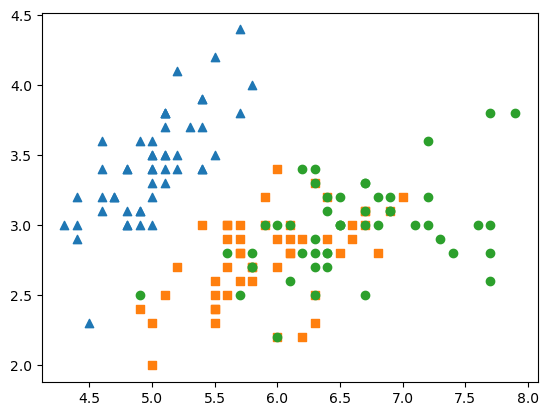

In [3]:
markers=["^", "s", "o"]
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df["target"] == i]["sepal_l"]
    y_axis_data = iris_df[iris_df["target"] == i]["sepal_w"]
    plt.scatter(x_axis_data, y_axis_data, marker = marker)
    
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:, :-1])
pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
iris_df_pca = pd.DataFrame(iris_pca, columns = ["pca_component_1", "pca_component_2"])
iris_df_pca["target"] = iris.target
iris_df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


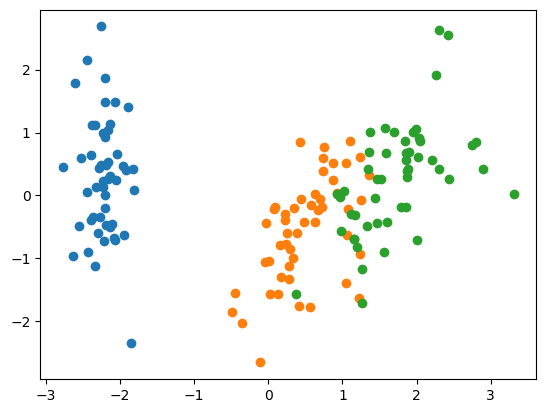

In [6]:
markers=["^", "s", "o"]

for i, maker in enumerate(markers):
    x_axis_points = iris_df_pca[iris_df_pca["target"] == i]["pca_component_1"]
    y_axis_points = iris_df_pca[iris_df_pca["target"] == i]["pca_component_2"]
    plt.scatter(x_axis_points, y_axis_points, marker = marker)
plt.show()    

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring="accuracy", cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [9]:
df = pd.read_excel(r"C:\Users\HyeonSoo\Desktop\고려대학교\2024년 2학기\KIST\practice_data\default+of+credit+card+clients\default of credit card clients.xls", header = 1, sheet_name = "Data").iloc[0:, 1:]
print(df.shape)
df.head()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.rename(columns={"PAY_0":"PAY_1", "default payment next month": "default"}, inplace=True)
y_target = df["default"]
X_features = df.drop("default", axis = 1)

           LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
LIMIT_BAL        1.0  NaN        NaN       NaN  NaN    NaN    NaN    NaN   
SEX              NaN  1.0        NaN       NaN  NaN    NaN    NaN    NaN   
EDUCATION        NaN  NaN        1.0       NaN  NaN    NaN    NaN    NaN   
MARRIAGE         NaN  NaN        NaN       1.0  NaN    NaN    NaN    NaN   
AGE              NaN  NaN        NaN       NaN  1.0    NaN    NaN    NaN   
PAY_1            NaN  NaN        NaN       NaN  NaN    1.0    NaN    NaN   
PAY_2            NaN  NaN        NaN       NaN  NaN    NaN    1.0    NaN   
PAY_3            NaN  NaN        NaN       NaN  NaN    NaN    NaN    1.0   
PAY_4            NaN  NaN        NaN       NaN  NaN    NaN    NaN    NaN   
PAY_5            NaN  NaN        NaN       NaN  NaN    NaN    NaN    NaN   
PAY_6            NaN  NaN        NaN       NaN  NaN    NaN    NaN    NaN   
BILL_AMT1        NaN  NaN        NaN       NaN  NaN    NaN    NaN    NaN   
BILL_AMT2   

<Axes: >

<Figure size 640x480 with 0 Axes>

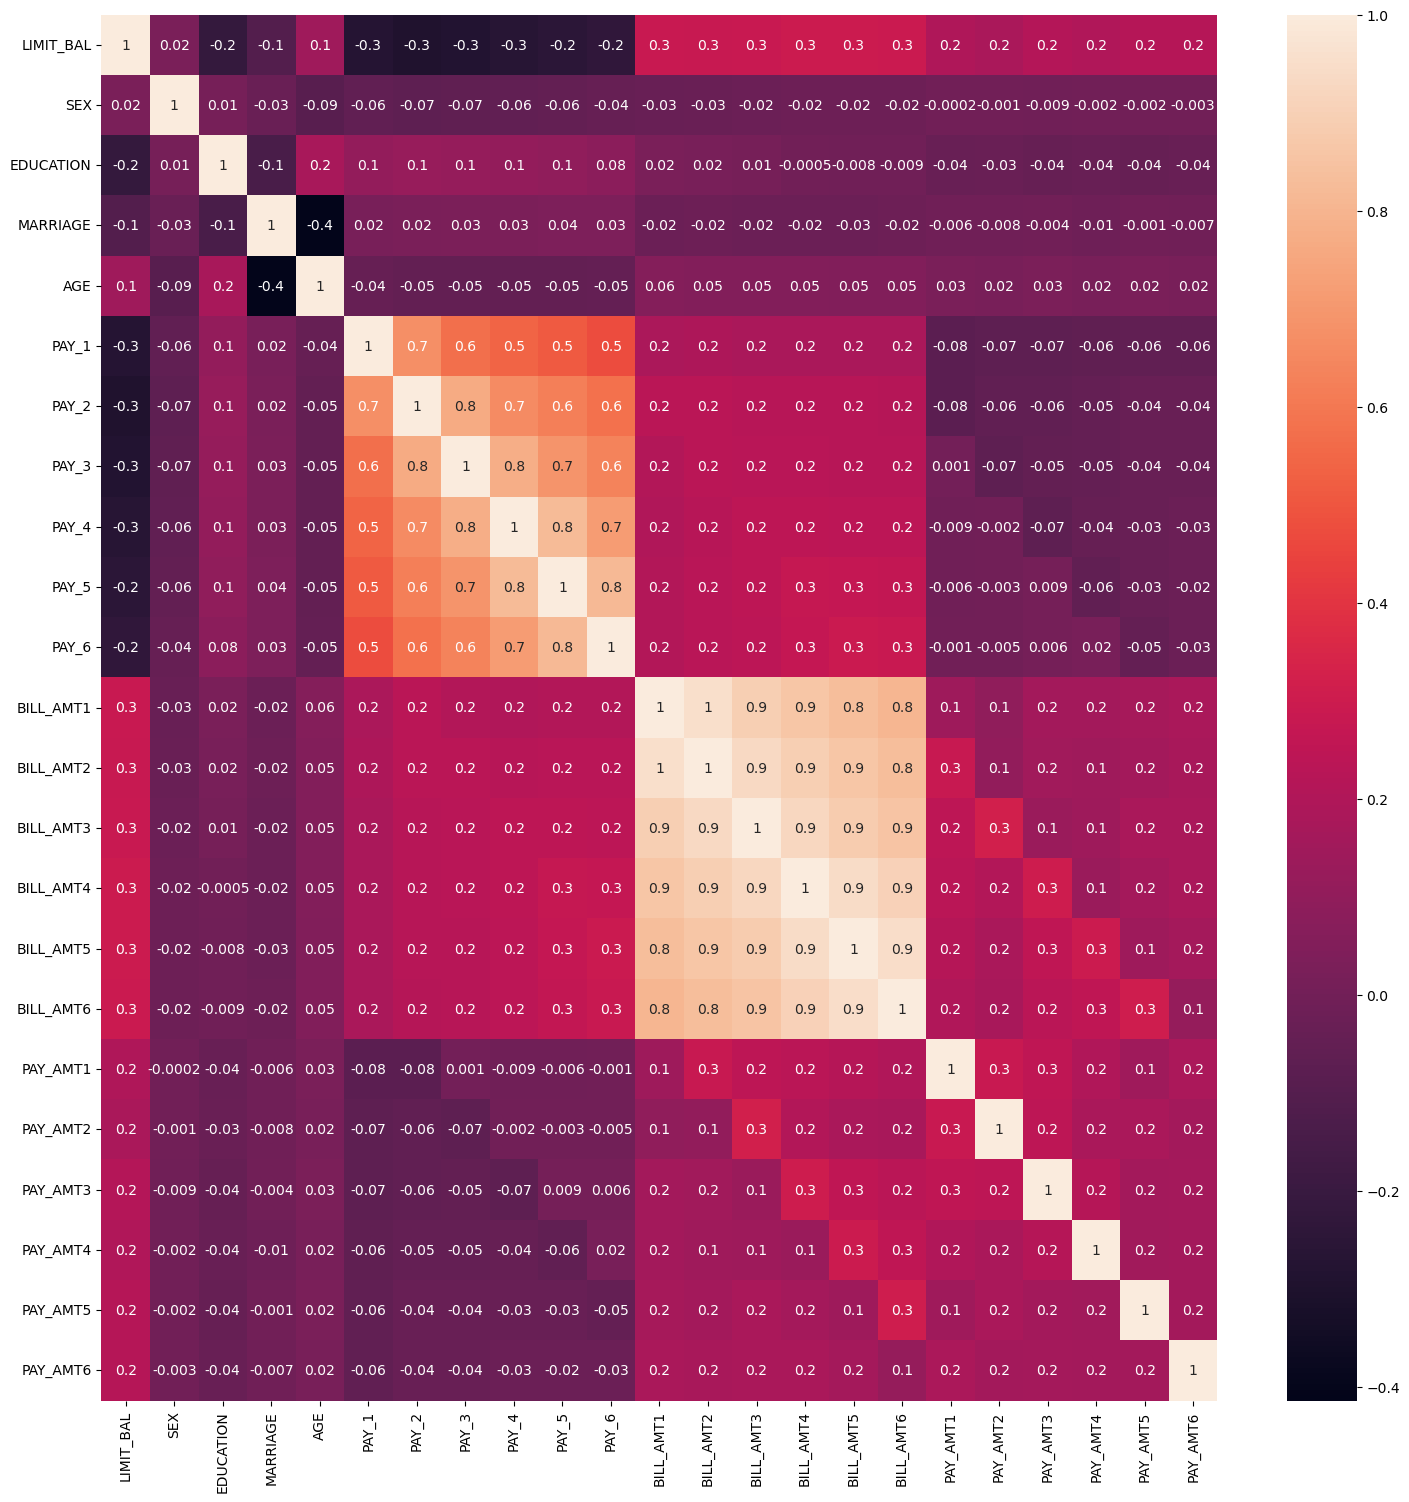

In [9]:
corr = X_features.corr()
plt.figure()
plt.figure(figsize=(18, 18))
sns.heatmap(corr, annot=True, fmt=".1g")

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ["BILL_AMT"+str(i) for i in range(1,7)]

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(2)
pca.fit(df_cols_scaled)
print(pca.explained_variance_ratio_)

NameError: name 'X_features' is not defined

In [11]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [13]:
import numpy as np 
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6,6))
print(matrix)

U, Sigma, Vt = svd(matrix, full_matrices = False)



[[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]


In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns =["sepal_l", "sepal_w", "petal_l", "petal_w"])
iris_df.head()

,sepal_l,sepal_w,petal_l,petal_w
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter= 300, random_state=0)
kmeans.fit(iris_df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [14]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [15]:
iris_df["target"] = iris.target
iris_df["cluster"] = kmeans.labels_
iris_df.head()

,sepal_l,sepal_w,petal_l,petal_w,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [16]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_transformed = pca.fit_transform(iris.data)

iris_df["pca_x"] = pca_transformed[:, 0]
iris_df["pca_y"] = pca_transformed[:, 1]

iris_df.head()

,sepal_l,sepal_w,petal_l,petal_w,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


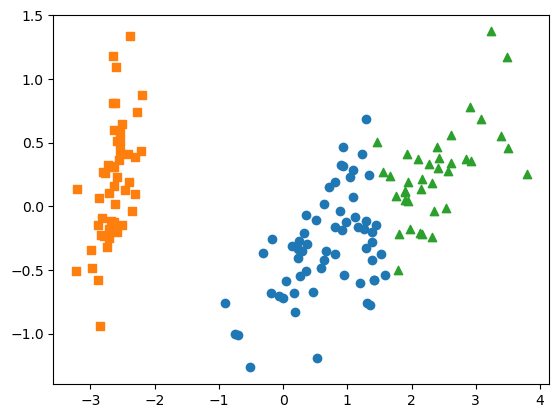

In [18]:
marker0_ind = iris_df[iris_df["cluster"] == 0].index
marker1_ind = iris_df[iris_df["cluster"] == 1].index
marker2_ind = iris_df[iris_df["cluster"] == 2].index

plt.scatter(x = iris_df.loc[marker0_ind, "pca_x"], y = iris_df.loc[marker0_ind, "pca_y"], marker="o")
plt.scatter(x = iris_df.loc[marker1_ind, "pca_x"], y = iris_df.loc[marker1_ind, "pca_y"], marker="s")
plt.scatter(x = iris_df.loc[marker2_ind, "pca_x"], y = iris_df.loc[marker2_ind, "pca_y"], marker="^")

plt.show()

In [21]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np 
import pandas as pd
%matplotlib inline

In [39]:
iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns = ["sepal_l", "sepal_w", "petal_l", "petal_2"])
pca_transformed = PCA(2).fit_transform(iris.data)
iris_df["pca_x"] = pca_transformed[:, 0]
iris_df["pca_y"] = pca_transformed[:, 1]

In [31]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter = 300, random_state=0).fit(iris_df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift

bandwidth = estimate_bandwidth(iris.data)
print(round(bandwidth, 3)) # 1.202

meanshift = MeanShift(bandwidth = bandwidth).fit_predict(iris_df[["pca_x", "pca_y"]])



1.202


In [49]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3, random_state= 0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [58]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric="euclidean")
dsbscan_labels = dbscan.fit_predict(iris.data)

In [59]:
iris_df["target"] = iris.target
iris_df["cluster_result"] = dsbscan_labels
iris_df.head()

,sepal_l,sepal_w,petal_l,petal_2,pca_x,pca_y,target,cluster_result
0,5.1,3.5,1.4,0.2,-2.684126,0.319397,0,0
1,4.9,3.0,1.4,0.2,-2.714142,-0.177001,0,0
2,4.7,3.2,1.3,0.2,-2.888991,-0.144949,0,0
3,4.6,3.1,1.5,0.2,-2.745343,-0.318299,0,0
4,5.0,3.6,1.4,0.2,-2.728717,0.326755,0,0


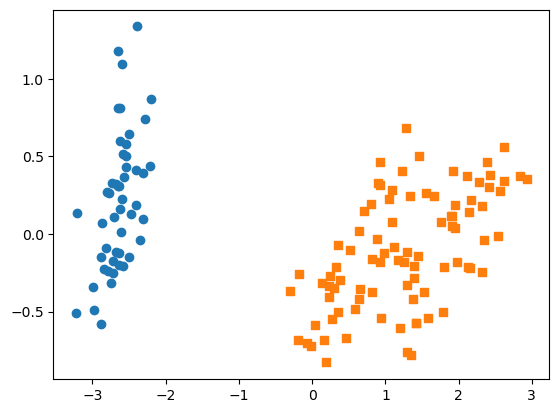

In [60]:
marker0_ind = iris_df[iris_df["cluster_result"]==0].index
marker1_ind = iris_df[iris_df["cluster_result"]==1].index
marker2_ind = iris_df[iris_df["cluster_result"]==2].index

plt.scatter(x=iris_df.loc[marker0_ind, "pca_x"], y=iris_df.loc[marker0_ind, "pca_y"], marker="o")
plt.scatter(x=iris_df.loc[marker1_ind, "pca_x"], y=iris_df.loc[marker1_ind, "pca_y"], marker="s")
plt.scatter(x=iris_df.loc[marker2_ind, "pca_x"], y=iris_df.loc[marker2_ind, "pca_y"], marker="^")

plt.show()